In [48]:
import numpy
import easygui
import pandas as pd
import numpy as np
from pyearth import Earth
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression

In [15]:
# Load file


sensor_data = easygui.fileopenbox()





In [16]:
sensor_data

'/home/hector/GUI_linefollower/micromouse/sensors/sensors_prueba.csv'

In [17]:
data_frame = pd.read_csv(sensor_data)

In [18]:
data_frame.head(50)

,Distance,floff,froff,sloff,sroff,flon,fron,slon,sron
0,0.01,75,72,563,68,3931,3936,4036,3931
1,0.02,51,54,877,44,3922,3924,4015,3915
2,0.03,47,58,755,52,3904,3903,3999,3901
3,0.04,51,70,760,60,3884,3890,3988,3886
4,0.05,58,79,924,62,3855,3870,3976,3871
5,0.06,61,79,1044,60,3787,3844,3967,3853
6,0.07,61,76,1069,54,3071,3532,3965,3815
7,0.08,60,76,1039,53,2644,3169,3960,3566
8,0.09,60,74,959,51,2265,2789,3956,3086
9,0.10,60,73,868,51,1946,2500,3954,2658


In [21]:
sensor_on_col = "flon"
sensor_off_col = "floff"
y_col = "Distance"


In [43]:
mars = Earth(max_degree=1, penalty=1.0, endspan=3)


sensor_proc = np.log(data_frame[sensor_on_col] - data_frame[sensor_off_col])

y = data_frame[y_col]

mars.fit(sensor_proc, y)

#Print the model
print(mars.trace())
print(mars.summary())

y_hat = mars.predict(sensor_proc)

/home/hector/GUI_programacion/python/envs/envnlp/lib/python3.6/site-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/home/hector/GUI_programacion/python/envs/envnlp/lib/python3.6/site-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth(allow_linear=None, allow_missing=False, check_every=None,
   enable_pruning=True, endspan=3, endspan_alpha=None, fast_K=None,
   fast_h=None, feature_importance_type=None, max_degree=1, max_terms=None,
   min_search_points=None, minspan=None, minspan_alpha=None, penalty=1.0,
   smooth=None, thresh=None, use_fast=None, verbose=0, zero_tol=None)

In [67]:
reg = LinearRegression().fit(np.array(sensor_proc).reshape(-1,1), y)

y_reg = reg.predict(np.array(sensor_proc).reshape(-1,1))
    

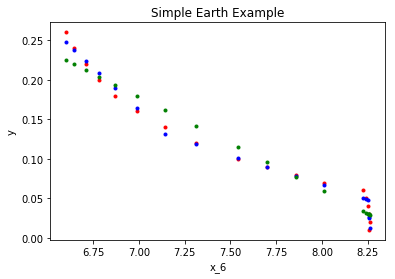

In [68]:

pyplot.figure()
pyplot.plot(sensor_proc, np.array(y),'r.')
pyplot.plot(sensor_proc, y_hat,'b.')
pyplot.plot(sensor_proc, y_reg,'g.')

pyplot.xlabel('x_6')
pyplot.ylabel('y')
pyplot.title('Simple Earth Example')
pyplot.show()